Assignment 4: Gaussian Processes for Regression

Deadline: October 17, 2017 (Thursday) at 5pm

Karolina Bargiel

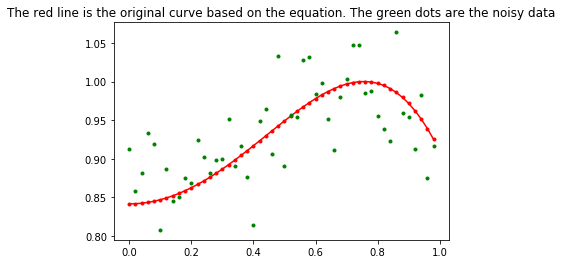

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg
range_of_data = 1

 # 1. Generate 50 2D-data points using the following function:  y = sin (x^2 +1)
def actual_distribution():
    x = np.arange(0, 1, 0.02)
    np.random.seed(0) 
    y = np.sin(x**2 +1)
   
    return x, y

# 2. Add Gaussian random noise to the data

def add_noise(y_curve):
    mu =0
    sigma = 0.04
    noise = np.random.normal(mu, sigma, len(y_curve))
    y_noise = y_curve + noise
    
    
    return y_noise

#3. Show the original curve line and the noisy data.

import matplotlib.pyplot as plt
x, y = actual_distribution()
t = add_noise(y)
plt.plot(x, y, "r")
plt.plot(x, y, "r.")
plt.plot(x, t, "g.")
plt.title("The red line is the original curve based on the equation. The green dots are the noisy data")

plt.show()

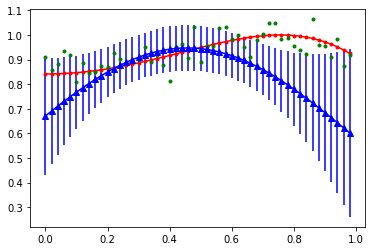

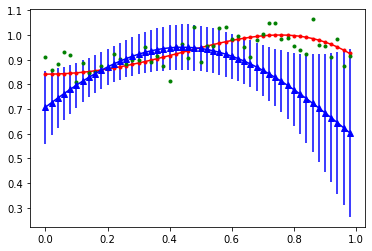

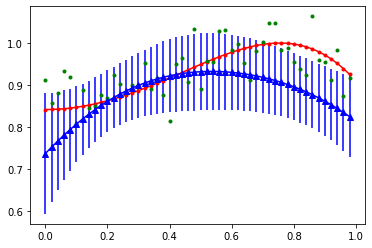

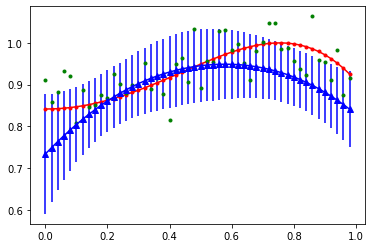

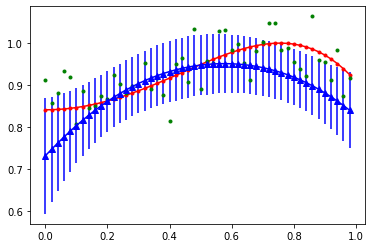

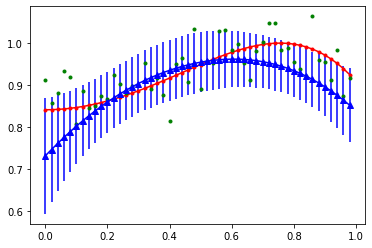

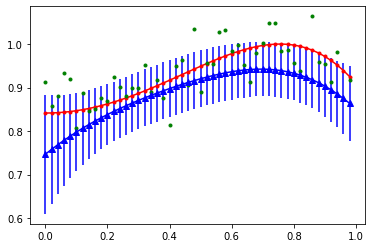

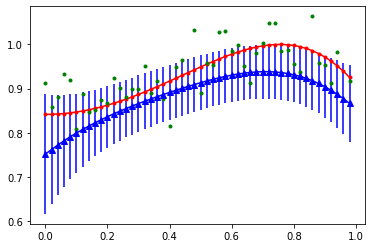

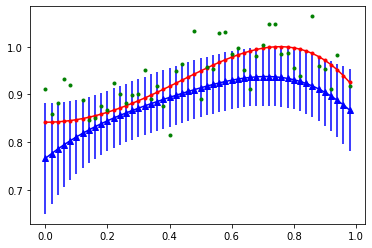

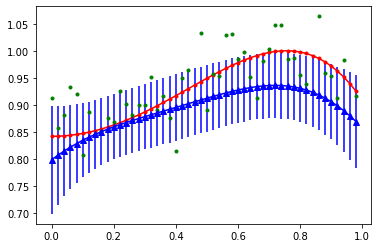

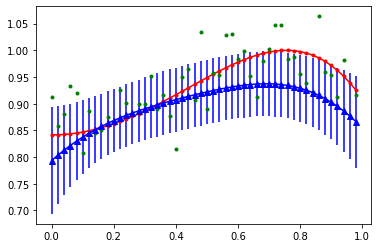

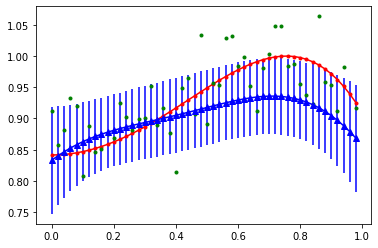

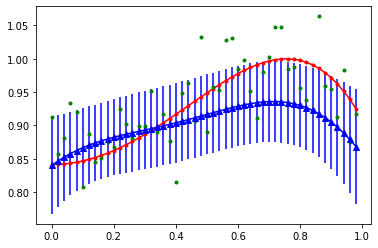

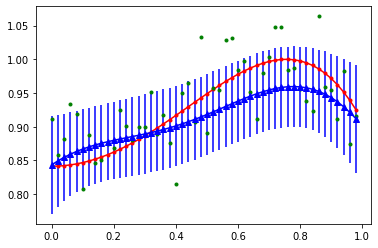

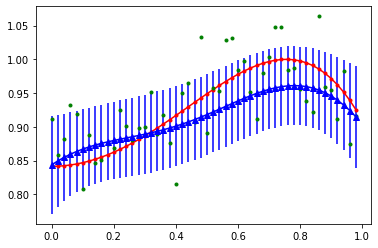

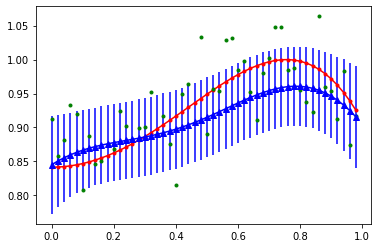

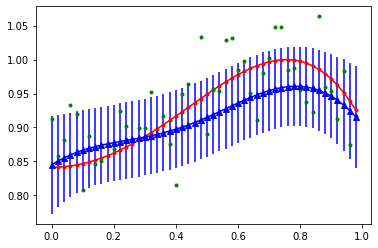

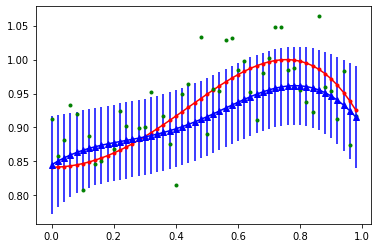

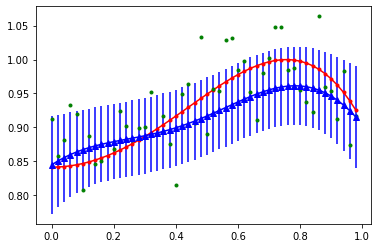

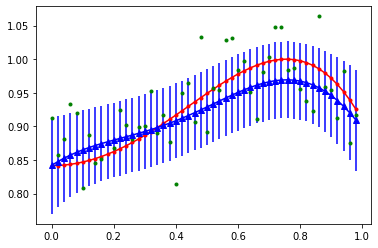

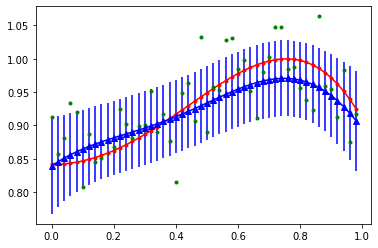

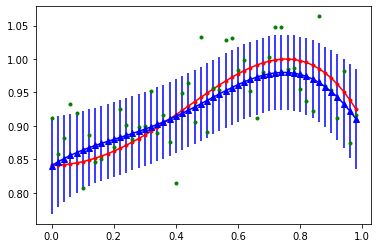

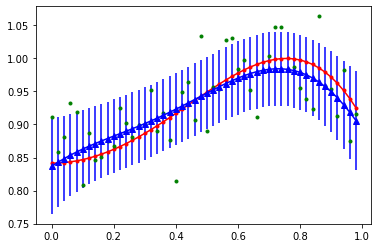

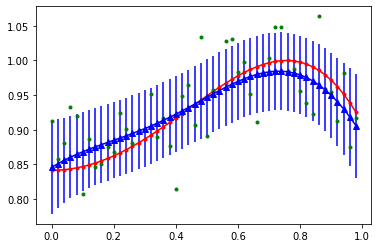

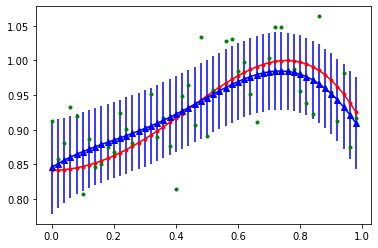

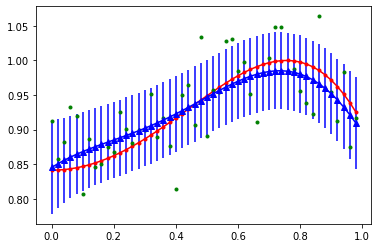

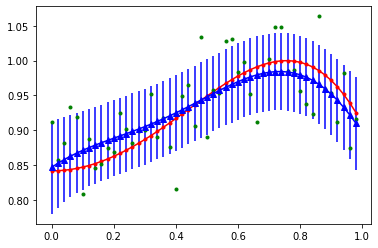

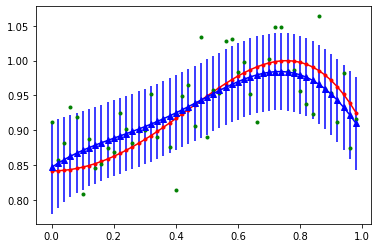

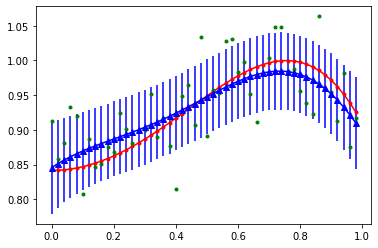

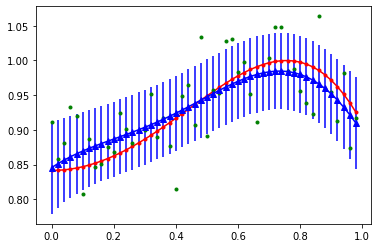

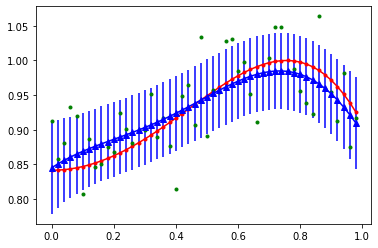

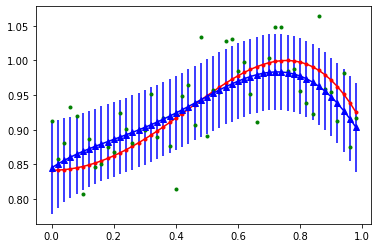

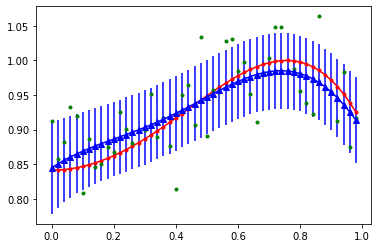

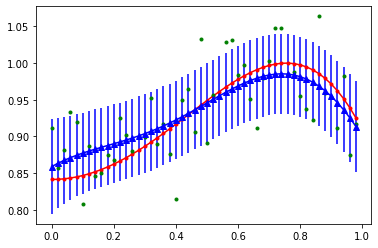

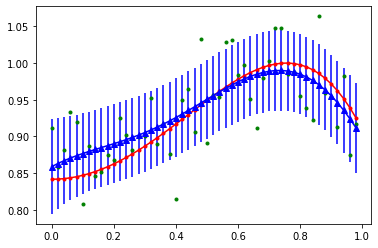

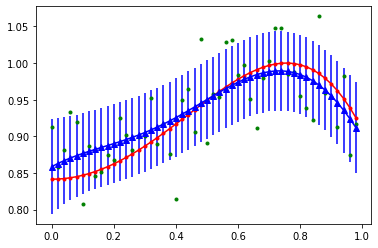

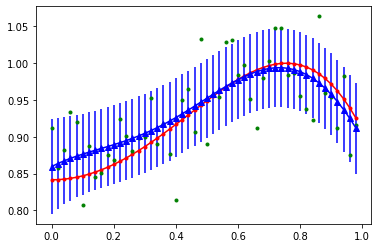

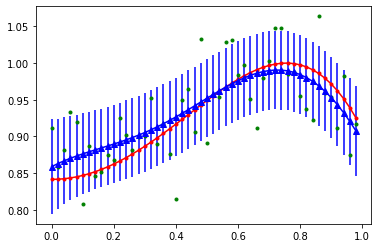

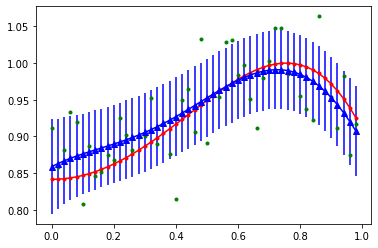

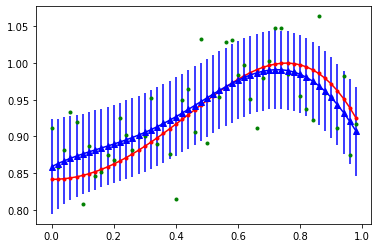

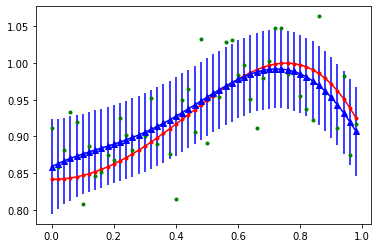

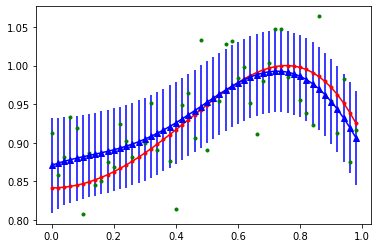

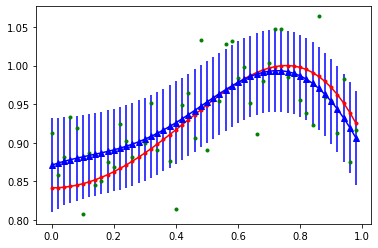

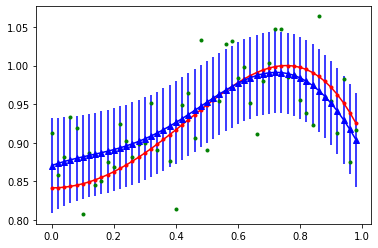

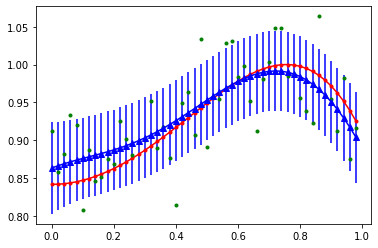

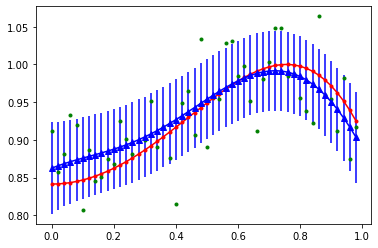

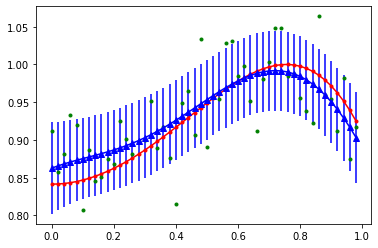

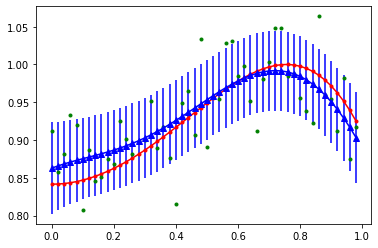

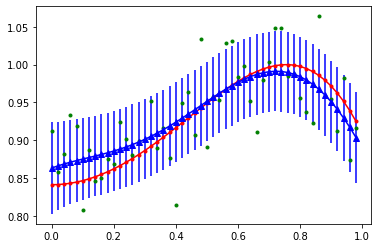

In [2]:
#4.Compute the Gaussian process prediction of every input data sequentially, where each input data is taken randomly from the noise data.

from random import sample
import numpy as np

r = np.arange(50)
np.random.shuffle(r)

N = len(x)
beta = 20

#5.Use the kernel we discuss in class (textbook's Eq. (6.63), page 307), by setting thetas: (1.0, 4.0, 0.0, 0.0)

def getk(i, j):
   
    theta_0 = 1.0 
    theta_1 = 4.0
    theta_2 = 0.0
    theta_3 = 0.0
    x_i = np.array([i])
    x_j = np.array ([j])
    tmp = -(theta_1/2) * (np.abs(x_i - x_j))**2
    k = theta_0 * np.exp(tmp) + theta_2 + (theta_3 *np.matmul (x_i.transpose(), x_j))
     
    return k

def k_array(n, x1, r):
    k = np.zeros((n, 1))
    for i in range(0,n):
        k[i, 0] = getk(x[r[i]], x1)
    return k

C_star = getk(x[r[0]], x[r[0]]) + 1/beta
C_old = np.matrix(C_star) 


t_observe = [t[r[0]]]

for j in range(1, 50):
   
    a = r[j]
    t_observe.append(t[a])
    m =[]
    sigma =[]
    c = getk(x[a], x[a]) + 1/beta
    C_new1 = np.append(C_old, k_array(j, x[a], r), axis = 1)
    C_new2 = np.append(k_array(j, x[a], r).transpose(), np.matrix(c), axis = 1)
    C_new = np.append(C_new1, C_new2, axis = 0)
    C_old = C_new
   
    
    for i in range(0, N):
            
        k1 = k_array(j+1, x[i], r)

        m_new = np.matmul((np.matmul(k1.transpose(), np.linalg.inv(C_new))), t_observe)
        m.append(np.asscalar(m_new))
        sigma_new = (getk(x[i], x[i]) + 1/beta) - np.matmul(k1.transpose(), (np.matmul(np.linalg.inv(C_new), k1)))
        sigma.append(np.asscalar(sigma_new))

#7. Show your best prediction results for all 50 data one by one:

    plt.plot(x, y, "r")
    plt.plot(x, y, "r.")
    plt.plot(x, t, "g.")
    plt.plot(x, m, "b")
    plt.errorbar(x, m, yerr =sigma, ecolor = 'b', fmt = 'b^')
    plt.show()
   

6.Experiment with your code by changing beta, and explain what beta is for and how it affects the results.

Beta above is a hyperparameter representing the precision of the noise and is used to calculate c. As 1/beta is proportional to the certainty level: increasing beta decreses the uncertainty, while decreasing it increases the uncertainty. So the best fitting beta will be realitvly big (in my case it eqauls to 20). It is worth mentioning that within carnel the changes on beta do not affect the output as significantly as in a previous methods discussed in other assignments. 

Below I present the example with low beta set:



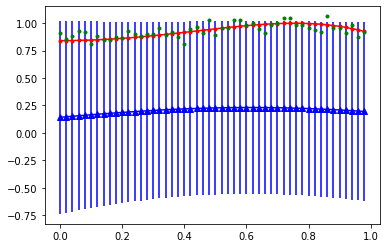

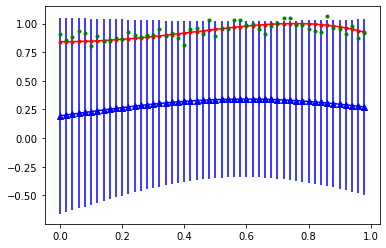

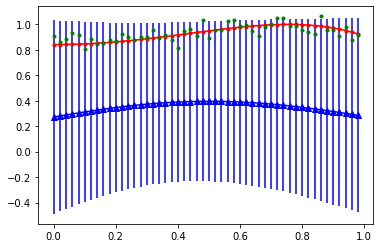

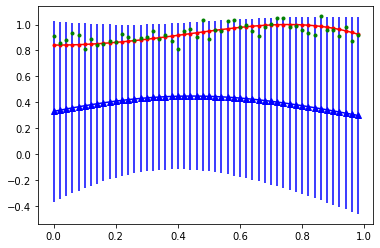

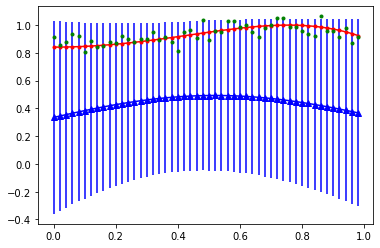

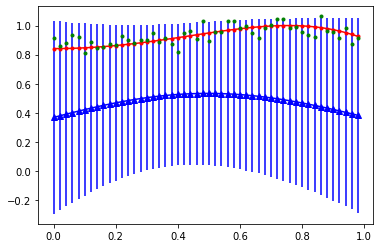

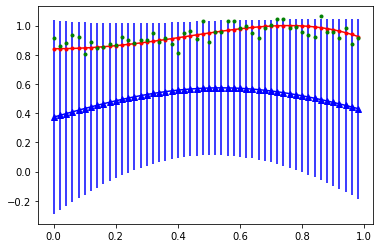

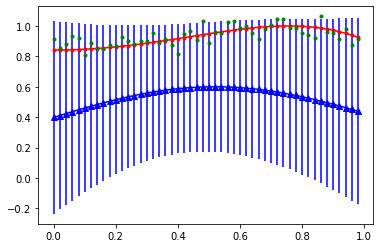

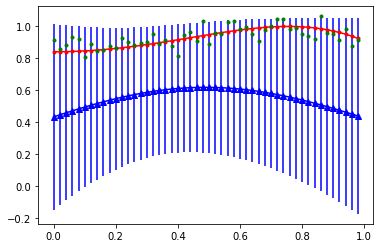

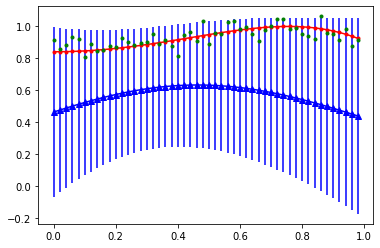

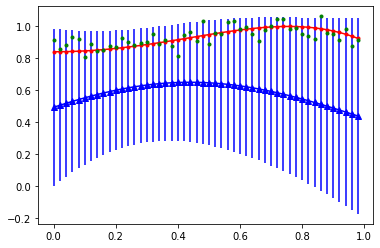

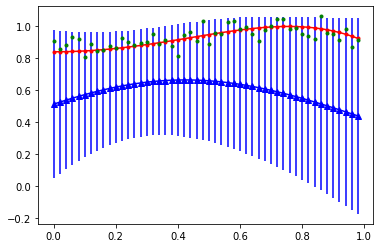

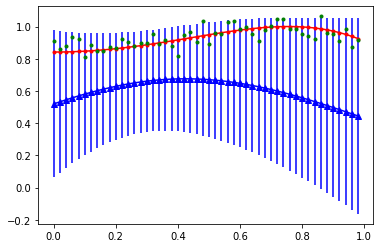

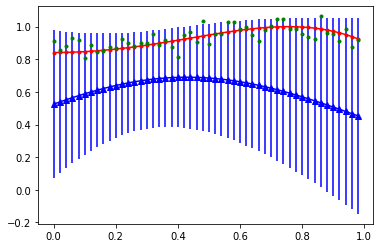

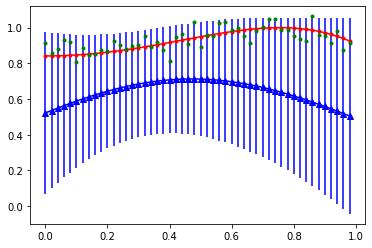

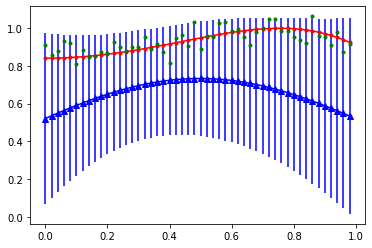

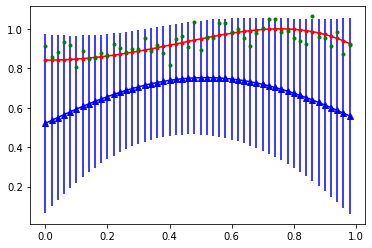

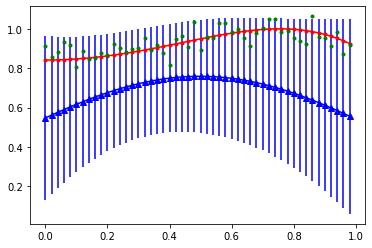

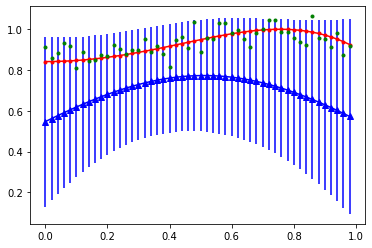

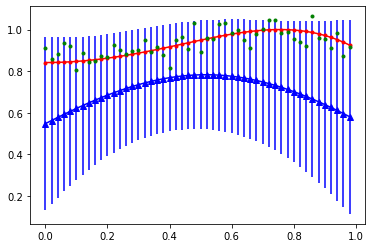

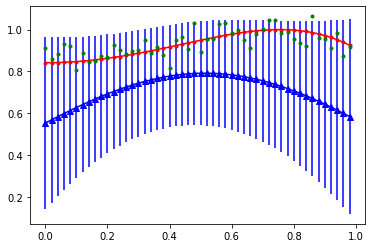

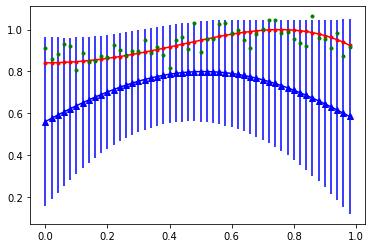

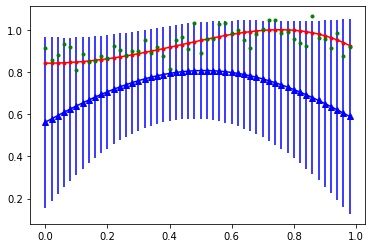

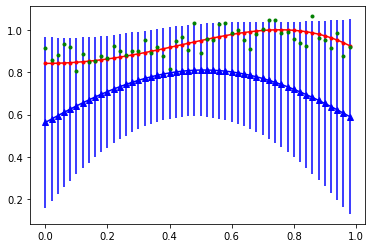

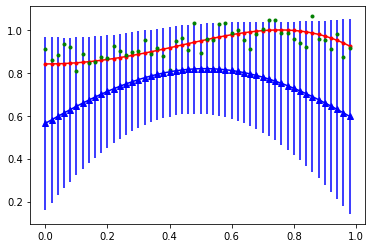

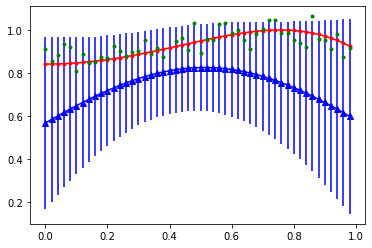

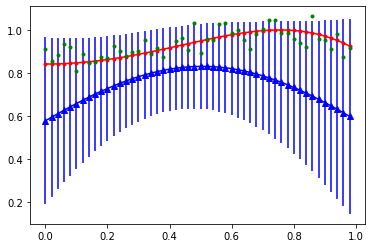

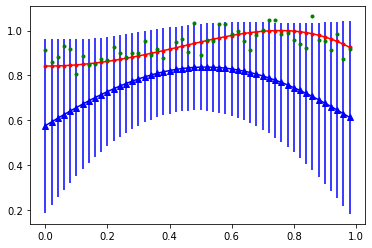

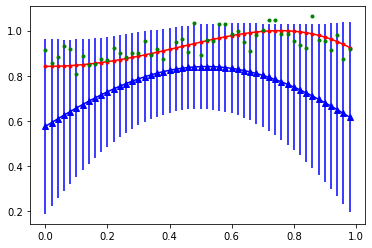

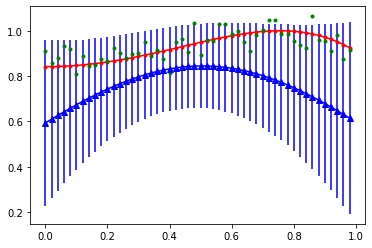

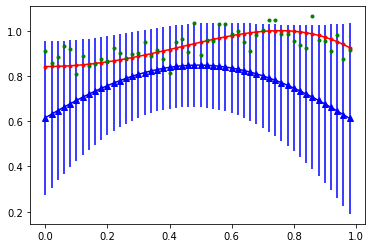

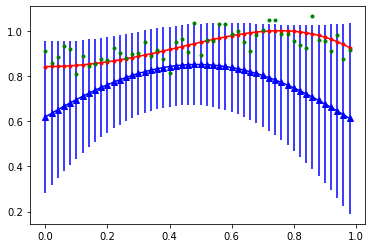

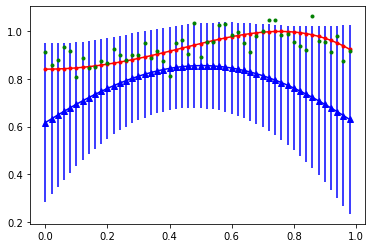

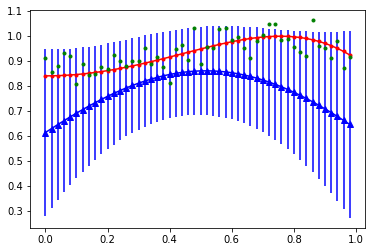

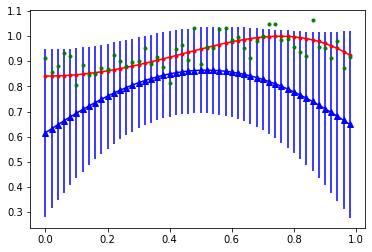

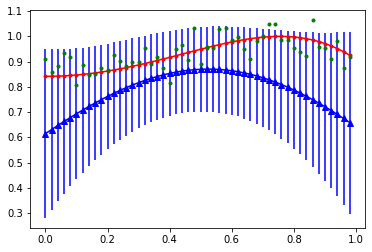

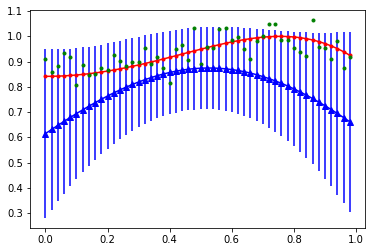

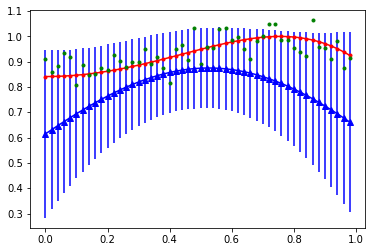

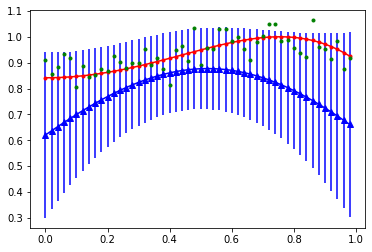

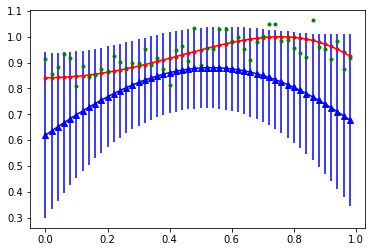

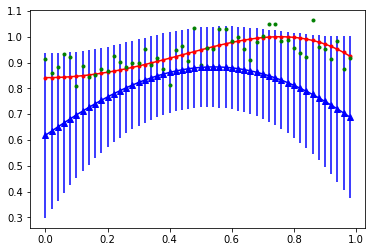

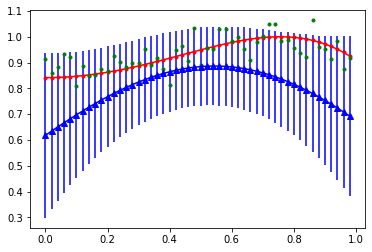

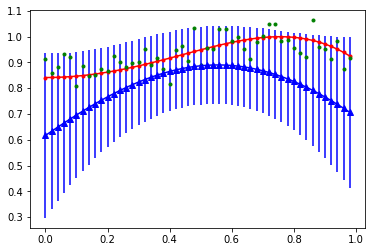

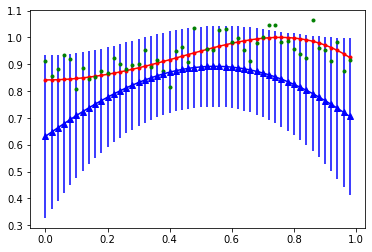

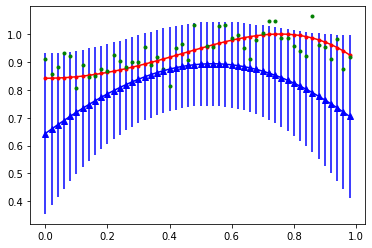

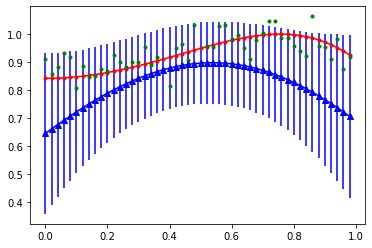

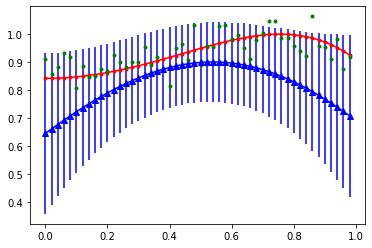

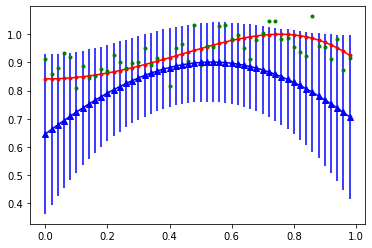

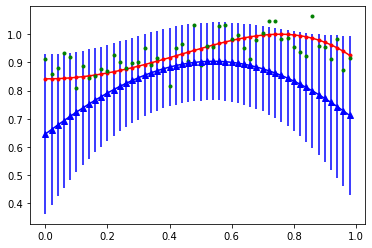

In [3]:
from random import sample
import numpy as np
r = np.arange(50)
np.random.shuffle(r)

N = len(x)
beta = 0.2

def getk(i, j):
   
    theta_0 = 1.0 
    theta_1 = 4.0
    theta_2 = 0.0
    theta_3 = 0.0
    x_i = np.array([i])
    x_j = np.array ([j])
    tmp = -(theta_1/2) * (np.abs(x_i - x_j))**2
    k = theta_0 * np.exp(tmp) + theta_2 + (theta_3 *np.matmul (x_i.transpose(), x_j))
     
    return k

def k_array(n, x1, r):
    k = np.zeros((n, 1))
    for i in range(0,n):
        k[i, 0] = getk(x[r[i]], x1)
    return k

C_star = getk(x[r[0]], x[r[0]]) + 1/beta
C_old = np.matrix(C_star) 


t_observe = [t[r[0]]]

for j in range(1, 50):
   
    a = r[j]
    t_observe.append(t[a])
    m =[]
    sigma =[]
    c = getk(x[a], x[a]) + 1/beta
    C_new1 = np.append(C_old, k_array(j, x[a], r), axis = 1)
    C_new2 = np.append(k_array(j, x[a], r).transpose(), np.matrix(c), axis = 1)
    C_new = np.append(C_new1, C_new2, axis = 0)
    C_old = C_new
   
    
    for i in range(0, N):
            
        k1 = k_array(j+1, x[i], r)

        m_new = np.matmul((np.matmul(k1.transpose(), np.linalg.inv(C_new))), t_observe)
        m.append(np.asscalar(m_new))
        sigma_new = (getk(x[i], x[i]) ) - np.matmul(k1.transpose(), (np.matmul(np.linalg.inv(C_new), k1)))
        sigma.append(np.asscalar(sigma_new))

    plt.plot(x, y, "r")
    plt.plot(x, y, "r.")
    plt.plot(x, t, "g.")
    plt.plot(x, m, "b")
    plt.errorbar(x, m, yerr =sigma, ecolor = 'b', fmt = 'b^')
    plt.show()
   

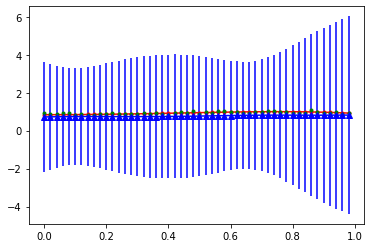

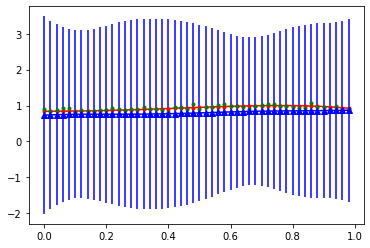

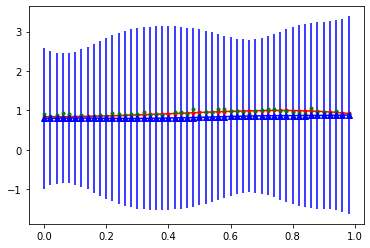

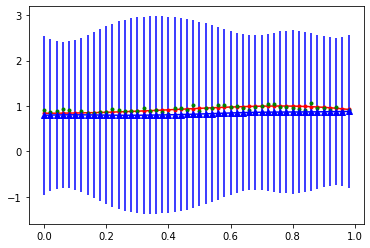

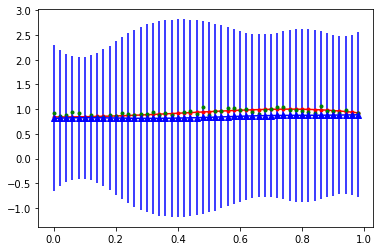

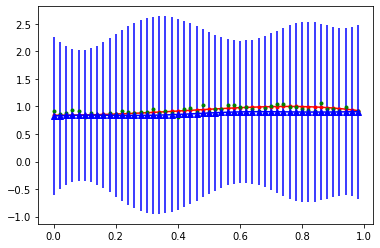

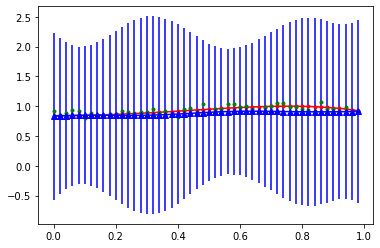

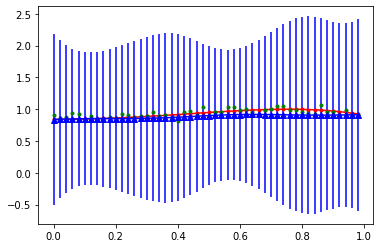

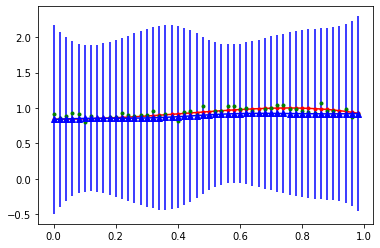

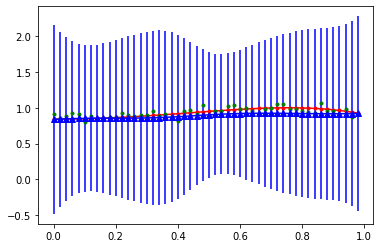

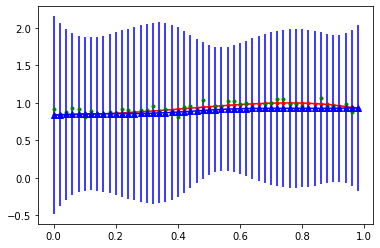

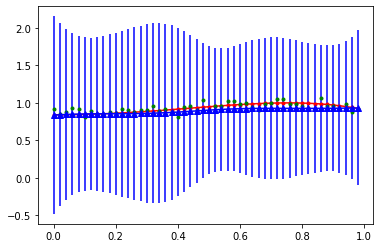

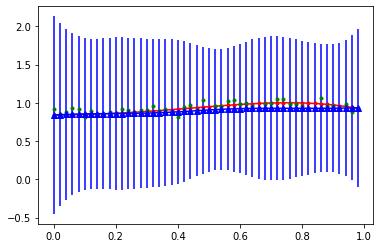

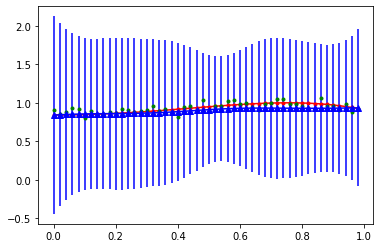

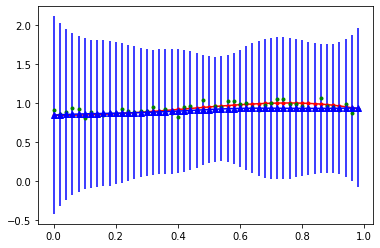

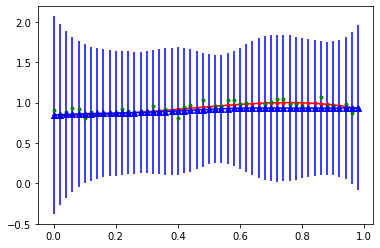

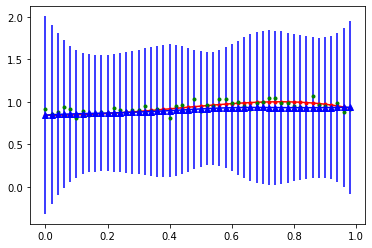

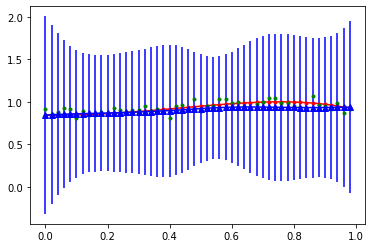

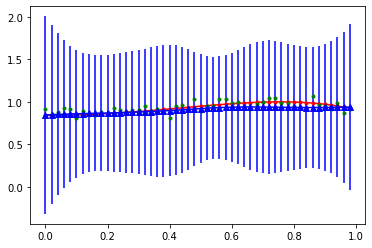

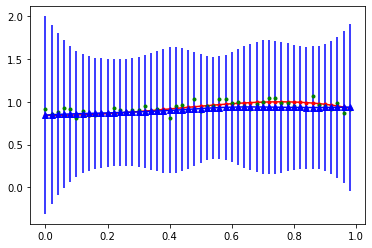

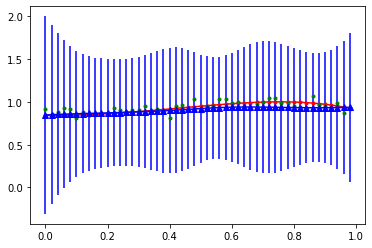

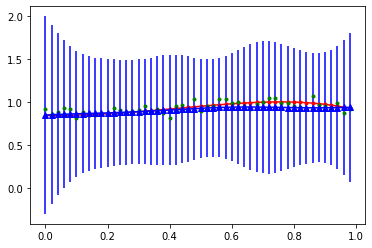

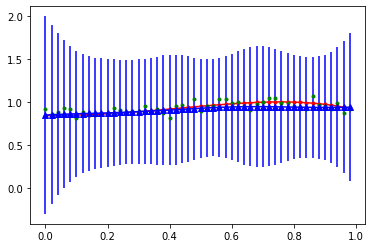

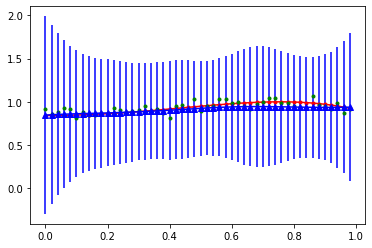

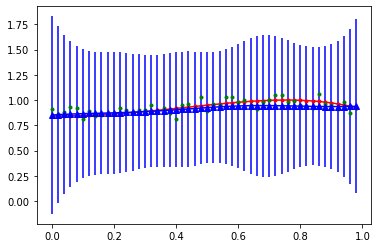

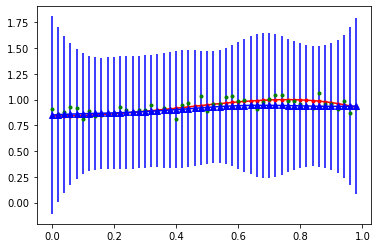

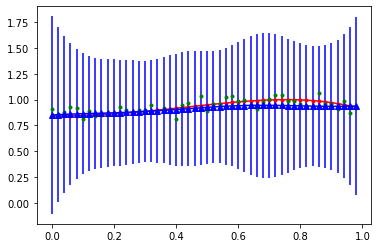

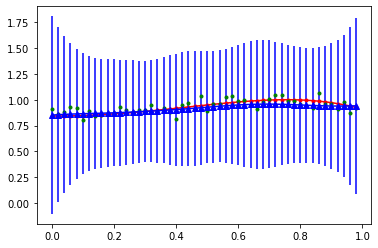

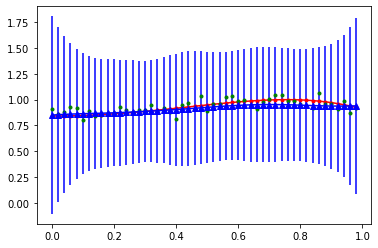

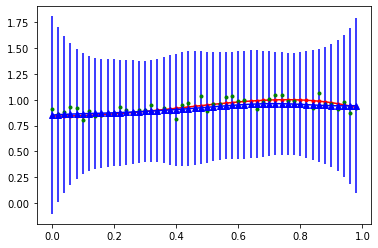

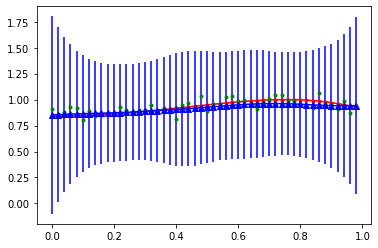

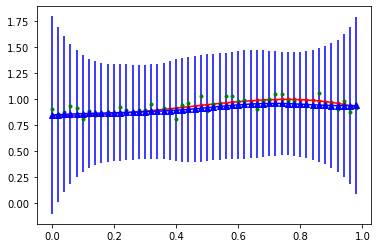

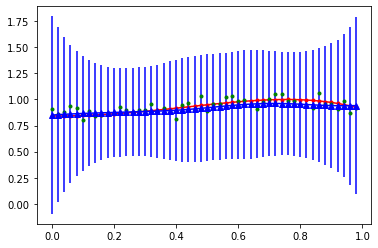

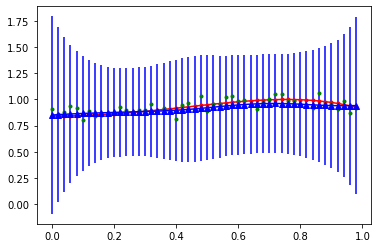

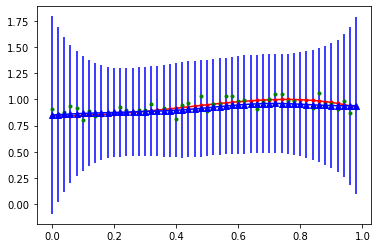

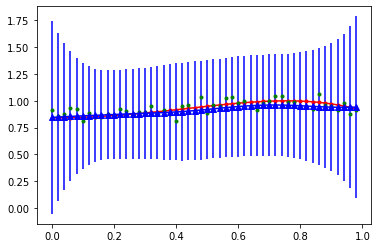

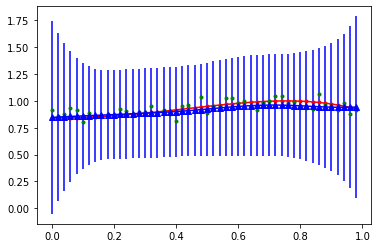

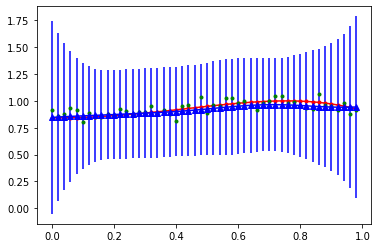

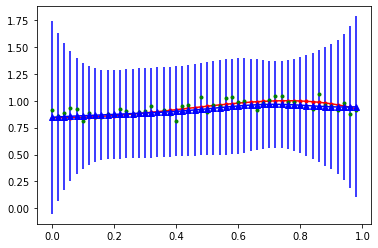

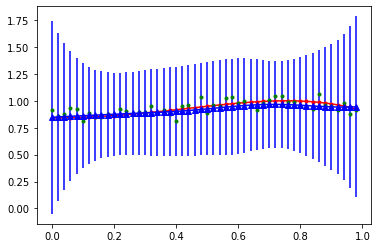

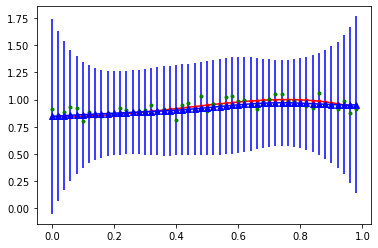

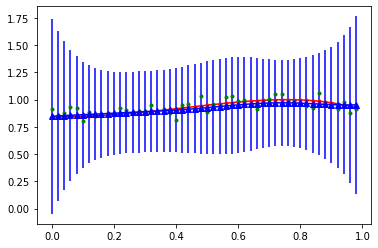

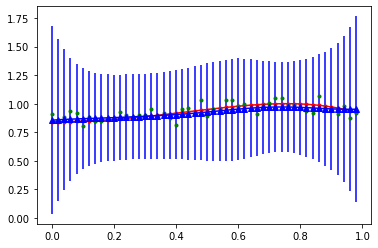

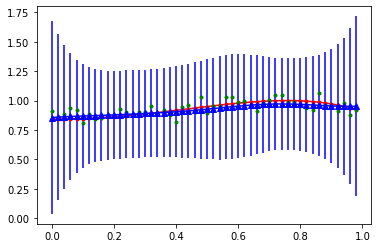

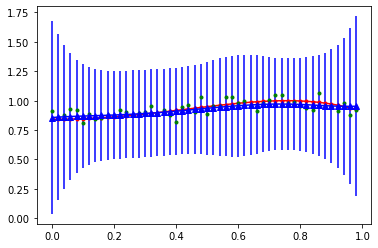

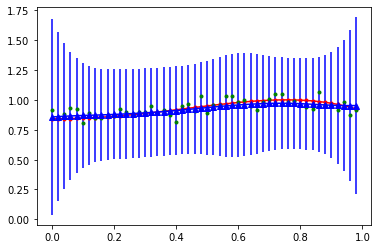

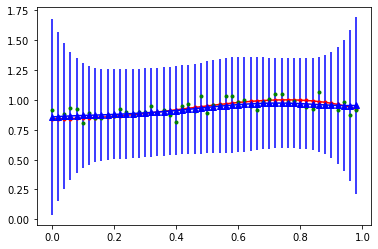

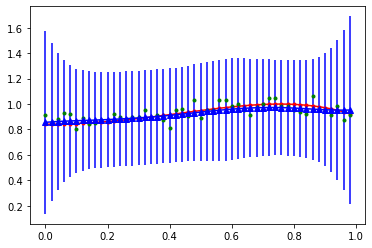

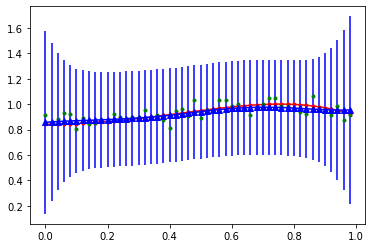

In [4]:
#8 Change the kernel's parameters, thetas: (1.0, 64.0, 10.0, 5.0), and show the results.
from random import sample
import numpy as np
r = np.arange(50)
np.random.shuffle(r)

N = len(x)
beta = 0.2

def getk_1(i, j):
   
    theta_0 = 1.0 
    theta_1 = 64.0
    theta_2 = 10.0
    theta_3 = 5.0
    x_i = np.array([i])
    x_j = np.array ([j])
    tmp = -(theta_1/2) * (np.abs(x_i - x_j))**2
    k = theta_0 * np.exp(tmp) + theta_2 + (theta_3 *np.matmul (x_i.transpose(), x_j))
     
    return k

def k_array(n, x1, r):
    k = np.zeros((n, 1))
    for i in range(0,n):
        k[i, 0] = getk_1(x[r[i]], x1)
    return k

C_star = getk_1(x[r[0]], x[r[0]]) + 1/beta
C_old = np.matrix(C_star) 


t_observe = [t[r[0]]]

for j in range(1, 50):
   
    a = r[j]
    t_observe.append(t[a])
    m =[]
    sigma =[]
    c = getk_1(x[a], x[a]) + 1/beta
    C_new1 = np.append(C_old, k_array(j, x[a], r), axis = 1)
    C_new2 = np.append(k_array(j, x[a], r).transpose(), np.matrix(c), axis = 1)
    C_new = np.append(C_new1, C_new2, axis = 0)
    C_old = C_new
   
    
    for i in range(0, N):
            
        k1 = k_array(j+1, x[i], r)

        m_new = np.matmul((np.matmul(k1.transpose(), np.linalg.inv(C_new))), t_observe)
        m.append(np.asscalar(m_new))
        sigma_new = (getk_1(x[i], x[i]) ) - np.matmul(k1.transpose(), (np.matmul(np.linalg.inv(C_new), k1)))
        sigma.append(np.asscalar(sigma_new))

    plt.plot(x, y, "r")
    plt.plot(x, y, "r.")
    plt.plot(x, t, "g.")
    plt.plot(x, m, "b")
    plt.errorbar(x, m, yerr =sigma, ecolor = 'b', fmt = 'b^')
    plt.show()

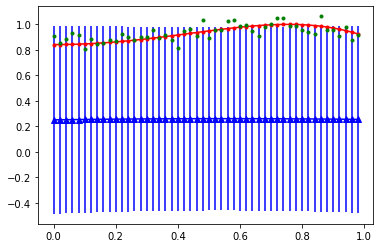

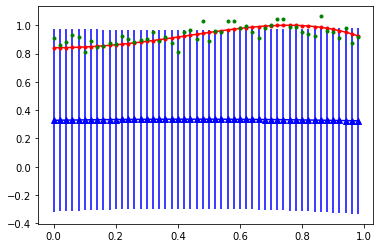

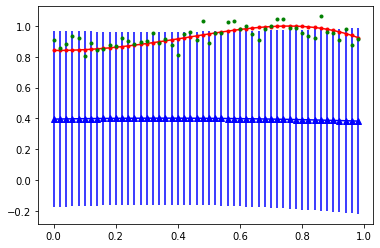

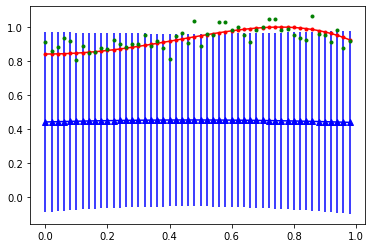

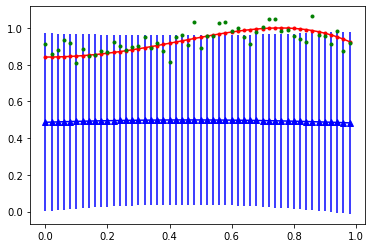

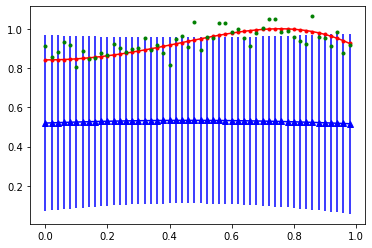

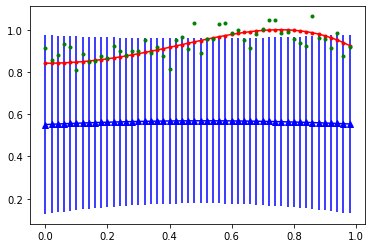

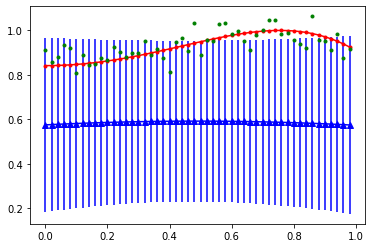

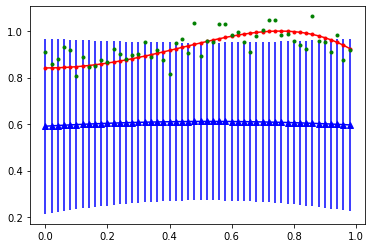

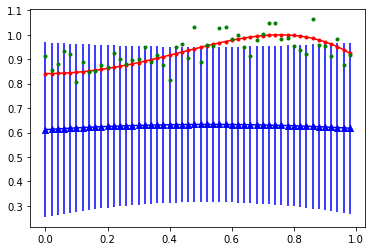

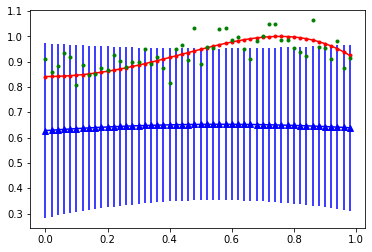

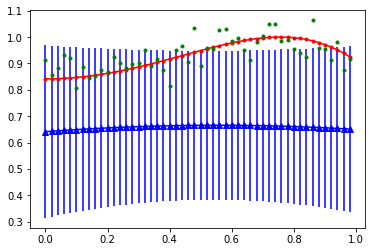

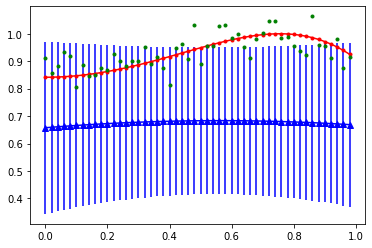

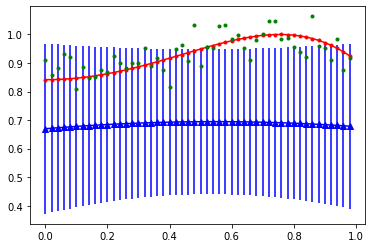

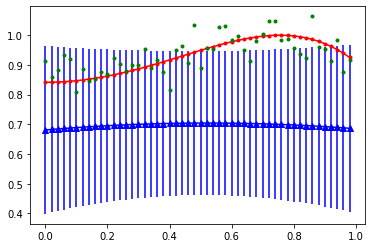

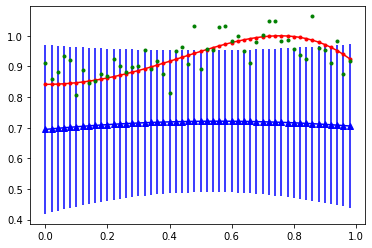

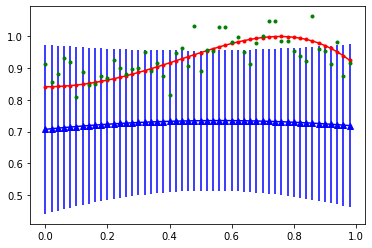

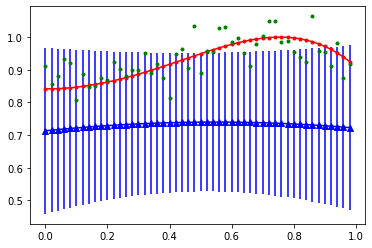

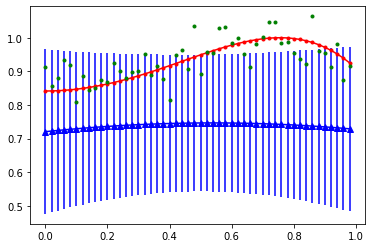

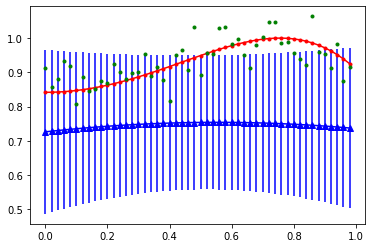

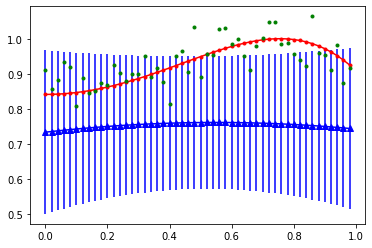

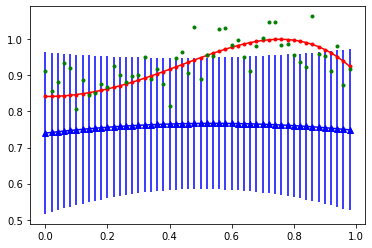

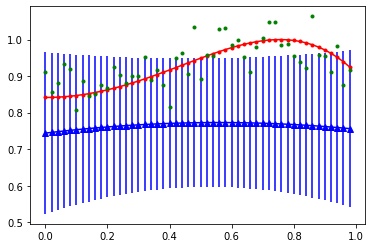

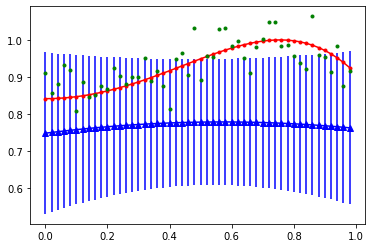

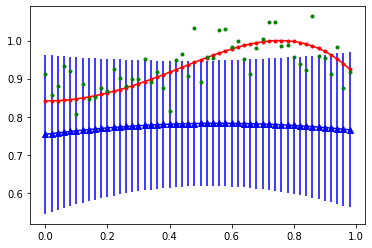

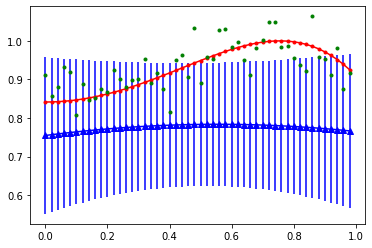

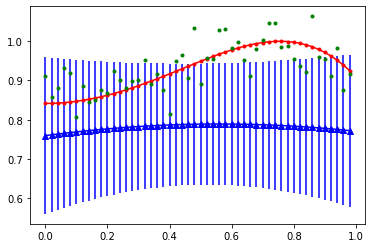

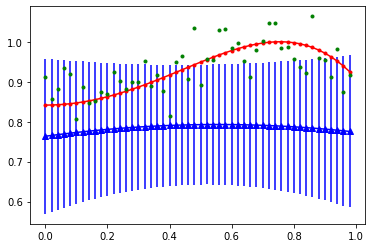

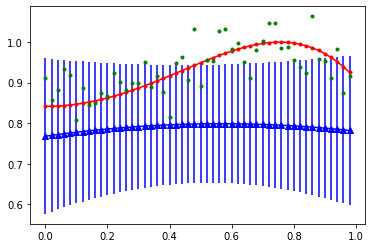

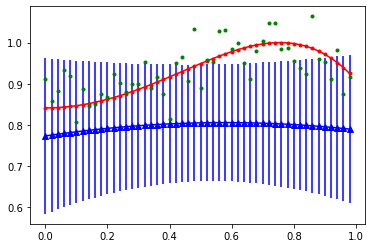

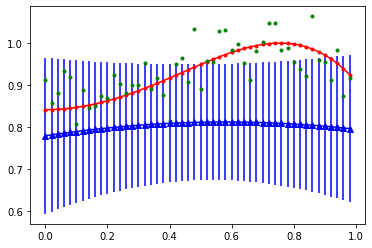

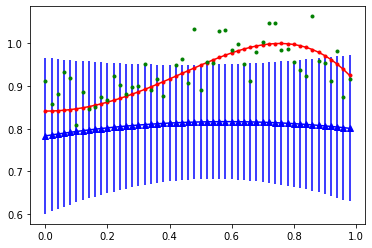

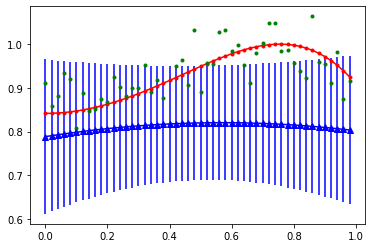

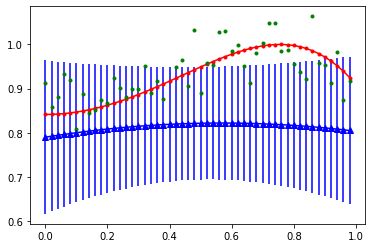

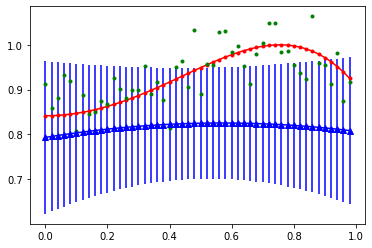

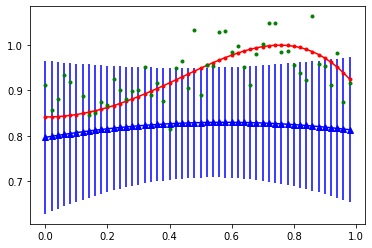

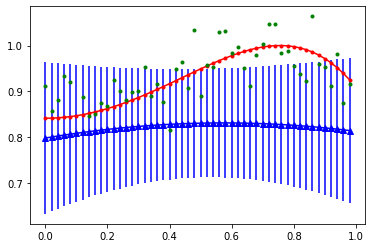

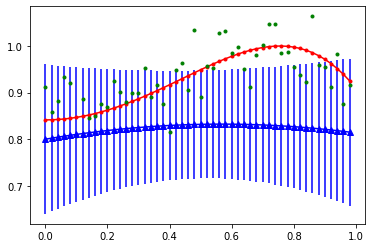

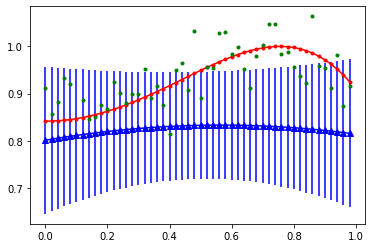

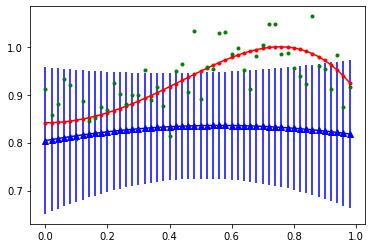

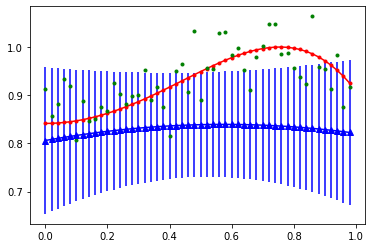

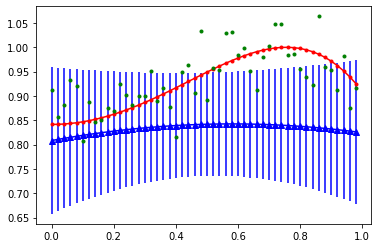

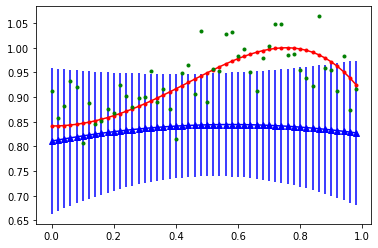

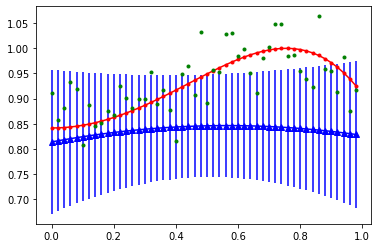

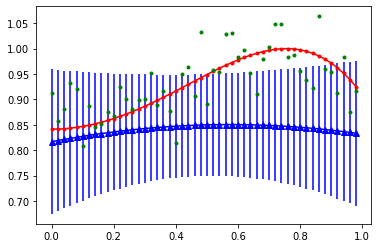

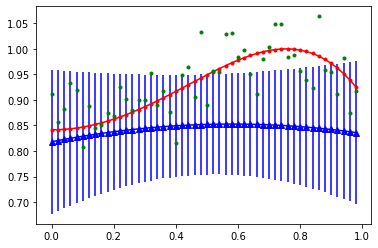

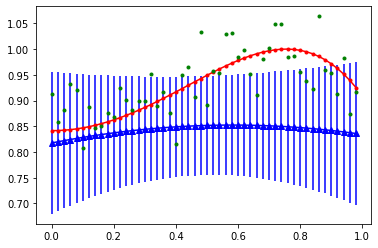

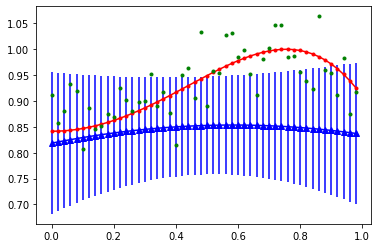

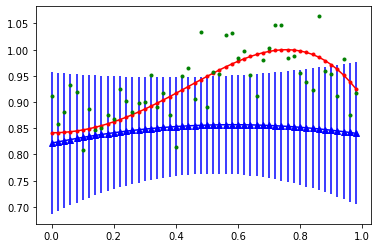

In [5]:
#10 Change the kernel's parameters, thetas: (1.0, 0.25, 0.0, 0.0), and show the results..
from random import sample
import numpy as np
r = np.arange(50)
np.random.shuffle(r)

N = len(x)
beta = 0.2

def getk_2(i, j):
   
    theta_0 = 1.0 
    theta_1 = 0.25
    theta_2 = 0.0
    theta_3 = 0.0
    x_i = np.array([i])
    x_j = np.array ([j])
    tmp = -(theta_1/2) * (np.abs(x_i - x_j))**2
    k = theta_0 * np.exp(tmp) + theta_2 + (theta_3 *np.matmul (x_i.transpose(), x_j))
     
    return k

def k_array(n, x1, r):
    k = np.zeros((n, 1))
    for i in range(0,n):
        k[i, 0] = getk_2(x[r[i]], x1)
    return k

C_star = getk_2(x[r[0]], x[r[0]]) + 1/beta
C_old = np.matrix(C_star) 


t_observe = [t[r[0]]]

for j in range(1, 50):
   
    a = r[j]
    t_observe.append(t[a])
    m =[]
    sigma =[]
    c = getk_2(x[a], x[a]) + 1/beta
    C_new1 = np.append(C_old, k_array(j, x[a], r), axis = 1)
    C_new2 = np.append(k_array(j, x[a], r).transpose(), np.matrix(c), axis = 1)
    C_new = np.append(C_new1, C_new2, axis = 0)
    C_old = C_new
   
    
    for i in range(0, N):
            
        k1 = k_array(j+1, x[i], r)

        m_new = np.matmul((np.matmul(k1.transpose(), np.linalg.inv(C_new))), t_observe)
        m.append(np.asscalar(m_new))
        sigma_new = (getk_2(x[i], x[i]) ) - np.matmul(k1.transpose(), (np.matmul(np.linalg.inv(C_new), k1)))
        sigma.append(np.asscalar(sigma_new))

    plt.plot(x, y, "r")
    plt.plot(x, y, "r.")
    plt.plot(x, t, "g.")
    plt.plot(x, m, "b")
    plt.errorbar(x, m, yerr =sigma, ecolor = 'b', fmt = 'b^')
    plt.show()

9&11.Explain what the effects of changing to this kernel on the prediction.

Our kernel function for Gaussian process regression is given by the exponential of a quadratic form, with the addition of constant and linear terms. This equation is expressed in the above code in the function getk(). Our goal here is to make predictions of the target variables for the new inputs, given a set of training data. By changing teta values we can reflect a different sensitivity of our covariance function. To say so the increase of theta 2 increases the noise in a sample from a Gaussian process prior defined by the covariance function. While decreasing these values make the plot flat and the connections limited. The above can be observed in exercise 8 and 10.
In the first one we set the values of thetas really high , especially theta_2, which leaves us with relatively good fitted curve but with a bug error. 
In the second one the low values of thetas make our curve underfit, and the plot shows the uncertainty of prediction. 

Below I include diagram where samples from prior are plotted for various values of the parameters θ0,...,θ3. The one’s which show our cases from above are top right and bottom left.

Source of a picture: Pattern Recognition and Machine Learning


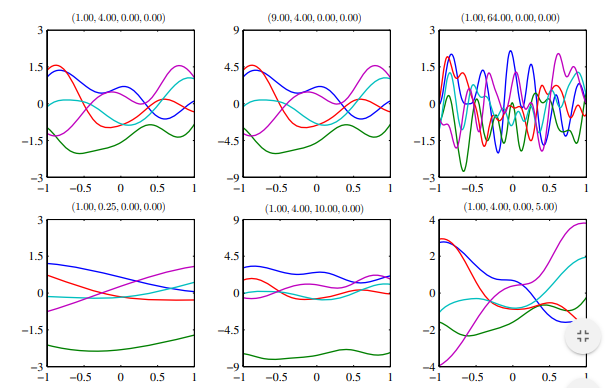